# Question and Background Info 

Our group is investigating **how to increase the profitability of QVC using customer transaction data.** In recent years, QVC's profitability has declined due to severe competition and diminished brand recognition. QVC’s profitability can be improved by analyzing customer transaction data in order to target high-spending customers and tailor promotions to their preferences; thus revenues would increase and costs associated with wasted promotions would be minimized. 

After merging the necessary tables across the 6 CSV files to create our final table, we created a data frame that contains 249,191 rows and 33 columns (32 features and 1 target variable). Our target variable is the spender column, which is a dummy variable in which the value of 1 is a high spender and 0 is a low spender. There is a 50/50 distribution among high spenders and low spenders. Our features include dummy variables for the category that the purchased product belongs to, the platform the order was placed on, the shopper segment code, email holds, and new customer indicators, as well as variables for the day, month, and hour the purchase was made.

Adittionally, we wanted to maximize for recall in order to better predict high-spenders as there would be costs associated with missclassifing a high-spender (wasted marketing dollars on low-spender).

QVC can benefit from using the insights provided by our models to influence their marketing campaigns and business decisions.

We've used the following methods:
 - Knn
 - Clustering
 - Decision Trees
 - Ensemble: Random Forest

# Import Packages

In [19]:
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import uniform, randint
from sklearn.preprocessing import MinMaxScaler # Normalize features

# Evaluation 
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix # accuracy and confusion matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report # precision, recall, and f1
from sklearn.metrics import plot_roc_curve, roc_auc_score # roc and auc


# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


# Modeling
from sklearn.tree import DecisionTreeClassifier # create a decision tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.cluster import KMeans

# Evaluation method
from sklearn.model_selection import train_test_split # Holdout validation
from sklearn.model_selection import StratifiedKFold # Stratified K-fold cross validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # Parameter tuning using cross validation

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import StratifiedKFold, cross_validate # KFold cross validation
import pprint

%precision 4

'%.4f'

In [2]:
pd.set_option('max_columns', None)

# Exploratory Data Analysis

In [3]:
# Read the .csv file and store it as a pandas DataFrame
data = pd.read_csv("customer_cleaned_merged.csv")

# Get the shape
print("Data shape (rows, cols):")
print(data.shape)

# Get the column types
print("\nFeature types:")
print(data.dtypes)

# Get the missing values
print("\nMissing info:")
print(data.isna().sum())

# View the data
data.head()

Data shape (rows, cols):
(249191, 33)

Feature types:
PLATFORM_On Air - 2nd Channel    float64
PLATFORM_QVC INSIDER MAGAZINE    float64
PLATFORM_QVC Voices              float64
PLATFORM_QVC.COM                 float64
PLATFORM_Streaming video         float64
ORDER_MONTH                      float64
ORDER_DAY                        float64
ORDER_HOUR                       float64
SEGMENT_2                          int64
SEGMENT_3                          int64
SEGMENT_4                          int64
HOLD                               int64
JAN_HOLD                           int64
NEW_CUST                           int64
CATEGORY_App/Accss Event         float64
CATEGORY_Apparel                 float64
CATEGORY_Collectibles            float64
CATEGORY_Costume Jewelry         float64
CATEGORY_Electronics             float64
CATEGORY_Entertainment           float64
CATEGORY_Fun & Leisure           float64
CATEGORY_Gift Cards              float64
CATEGORY_Health                  float64
CAT

,PLATFORM_On Air - 2nd Channel,PLATFORM_QVC INSIDER MAGAZINE,PLATFORM_QVC Voices,PLATFORM_QVC.COM,PLATFORM_Streaming video,ORDER_MONTH,ORDER_DAY,ORDER_HOUR,SEGMENT_2,SEGMENT_3,SEGMENT_4,HOLD,JAN_HOLD,NEW_CUST,CATEGORY_App/Accss Event,CATEGORY_Apparel,CATEGORY_Collectibles,CATEGORY_Costume Jewelry,CATEGORY_Electronics,CATEGORY_Entertainment,CATEGORY_Fun & Leisure,CATEGORY_Gift Cards,CATEGORY_Health,CATEGORY_Health/Beauty,CATEGORY_Home Decor,CATEGORY_Housewares,CATEGORY_IQVC Divisional,CATEGORY_Jewelry,CATEGORY_License Hardgds,CATEGORY_PUBLIC RELATION,CATEGORY_Returns,CATEGORY_Textile/Furnit,spender
0,0.0,0.0,0.0,0.0,0.0,2.000000,17.250000,12.500000,0,1,0,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.750000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,low
1,0.0,0.0,0.0,0.0,0.0,2.166667,16.000000,10.833333,0,0,1,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.000000,0.000000,0.0,0.166667,0.0,0.0,0.0,0.0,high
2,0.0,0.0,0.0,0.0,0.0,2.000000,16.000000,12.500000,0,1,0,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.500000,0.500000,0.0,0.000000,0.0,0.0,0.0,0.0,low
3,0.0,0.0,0.0,1.0,0.0,2.000000,13.000000,22.000000,0,0,0,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,low
4,0.0,0.0,0.0,0.0,0.0,1.666667,14.666667,14.555556,0,0,1,0,0,0,0.0,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.111111,0.111111,0.0,0.222222,0.0,0.0,0.0,0.0,low


# Prevelance of Target Variable

high    0.500002
low     0.499998
Name: spender, dtype: float64


<AxesSubplot:xlabel='spender', ylabel='count'>

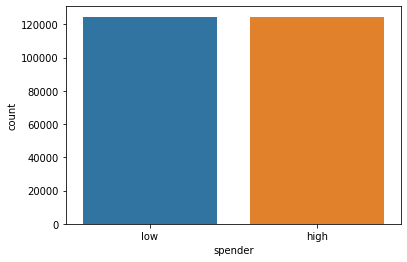

In [4]:
print(data.spender.value_counts()/data.spender.count())
sns.countplot(data.spender)

In [5]:
data.describe()

,PLATFORM_On Air - 2nd Channel,PLATFORM_QVC INSIDER MAGAZINE,PLATFORM_QVC Voices,PLATFORM_QVC.COM,PLATFORM_Streaming video,ORDER_MONTH,ORDER_DAY,ORDER_HOUR,SEGMENT_2,SEGMENT_3,SEGMENT_4,HOLD,JAN_HOLD,NEW_CUST,CATEGORY_App/Accss Event,CATEGORY_Apparel,CATEGORY_Collectibles,CATEGORY_Costume Jewelry,CATEGORY_Electronics,CATEGORY_Entertainment,CATEGORY_Fun & Leisure,CATEGORY_Gift Cards,CATEGORY_Health,CATEGORY_Health/Beauty,CATEGORY_Home Decor,CATEGORY_Housewares,CATEGORY_IQVC Divisional,CATEGORY_Jewelry,CATEGORY_License Hardgds,CATEGORY_PUBLIC RELATION,CATEGORY_Returns,CATEGORY_Textile/Furnit
count,249191.000000,249191.000000,249191.000000,249191.000000,2.491910e+05,249191.000000,249191.000000,249191.000000,249191.0,249191.000000,249191.000000,249191.0,249191.0,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.0,2.491910e+05,249191.000000
mean,0.003616,0.000027,0.000002,0.464885,2.806284e-08,2.053285,15.215791,13.824178,0.0,0.622771,0.156037,0.0,0.0,0.127597,0.000607,0.076973,0.000060,0.000854,0.017586,0.000366,0.007508,0.000006,0.000689,0.231739,0.430888,0.047962,0.019148,0.032791,0.000026,0.0,8.975242e-07,0.005318
std,0.030161,0.000980,0.000211,0.478128,1.400870e-05,0.683066,7.052476,5.053515,0.0,0.484694,0.362891,0.0,0.0,0.333641,0.007913,0.182728,0.001781,0.008620,0.079803,0.006328,0.040723,0.000517,0.009700,0.364648,0.430188,0.126818,0.080208,0.104146,0.001201,0.0,1.626638e-04,0.033234
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.571429,10.200000,11.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000
50%,0.000000,0.000000,0.000000,0.214286,0.000000e+00,2.000000,15.277778,14.000000,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000e+00,2.600000,20.000000,17.400000,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000
max,0.384615,0.051724,0.034483,1.000000,6.993007e-03,3.000000,31.000000,23.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,0.173913,0.891892,0.076923,0.144144,0.615385,0.181818,0.444444,0.071429,0.200000,1.000000,1.000000,0.777778,0.521739,0.625000,0.080000,0.0,4.000000e-02,0.350000


# Distribution of Features

[[<AxesSubplot:title={'center':'PLATFORM_On Air - 2nd Channel'}>
  <AxesSubplot:title={'center':'PLATFORM_QVC INSIDER MAGAZINE'}>
  <AxesSubplot:title={'center':'PLATFORM_QVC Voices'}>
  <AxesSubplot:title={'center':'PLATFORM_QVC.COM'}>
  <AxesSubplot:title={'center':'PLATFORM_Streaming video'}>
  <AxesSubplot:title={'center':'ORDER_MONTH'}>]
 [<AxesSubplot:title={'center':'ORDER_DAY'}>
  <AxesSubplot:title={'center':'ORDER_HOUR'}>
  <AxesSubplot:title={'center':'SEGMENT_2'}>
  <AxesSubplot:title={'center':'SEGMENT_3'}>
  <AxesSubplot:title={'center':'SEGMENT_4'}>
  <AxesSubplot:title={'center':'HOLD'}>]
 [<AxesSubplot:title={'center':'JAN_HOLD'}>
  <AxesSubplot:title={'center':'NEW_CUST'}>
  <AxesSubplot:title={'center':'CATEGORY_App/Accss Event'}>
  <AxesSubplot:title={'center':'CATEGORY_Apparel'}>
  <AxesSubplot:title={'center':'CATEGORY_Collectibles'}>
  <AxesSubplot:title={'center':'CATEGORY_Costume Jewelry'}>]
 [<AxesSubplot:title={'center':'CATEGORY_Electronics'}>
  <AxesSubplot

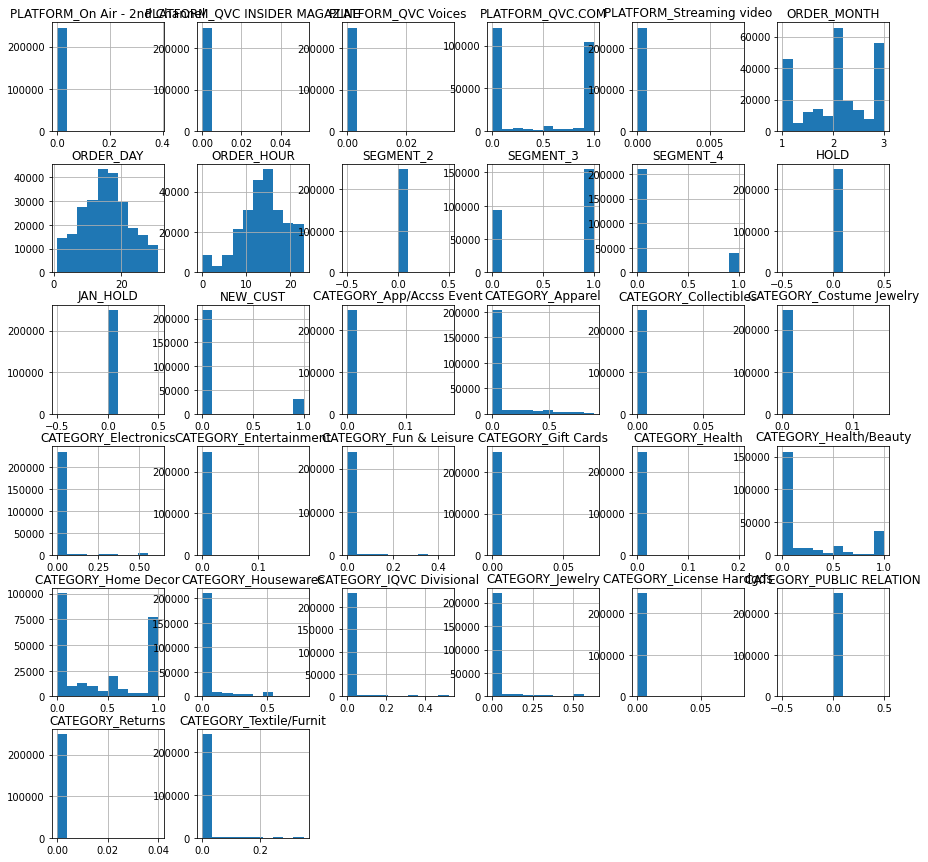

In [6]:
data_noclasslabel = data.drop("spender", axis = 1).hist(figsize=(15, 15))
print(data_noclasslabel)

# Seperate data into features and class labels

In [7]:
#Turn high to 1 and low to 0
data['spender'] = data.spender.map({'high':1, 'low':0})
data.head()

,PLATFORM_On Air - 2nd Channel,PLATFORM_QVC INSIDER MAGAZINE,PLATFORM_QVC Voices,PLATFORM_QVC.COM,PLATFORM_Streaming video,ORDER_MONTH,ORDER_DAY,ORDER_HOUR,SEGMENT_2,SEGMENT_3,SEGMENT_4,HOLD,JAN_HOLD,NEW_CUST,CATEGORY_App/Accss Event,CATEGORY_Apparel,CATEGORY_Collectibles,CATEGORY_Costume Jewelry,CATEGORY_Electronics,CATEGORY_Entertainment,CATEGORY_Fun & Leisure,CATEGORY_Gift Cards,CATEGORY_Health,CATEGORY_Health/Beauty,CATEGORY_Home Decor,CATEGORY_Housewares,CATEGORY_IQVC Divisional,CATEGORY_Jewelry,CATEGORY_License Hardgds,CATEGORY_PUBLIC RELATION,CATEGORY_Returns,CATEGORY_Textile/Furnit,spender
0,0.0,0.0,0.0,0.0,0.0,2.000000,17.250000,12.500000,0,1,0,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.750000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,2.166667,16.000000,10.833333,0,0,1,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.000000,0.000000,0.0,0.166667,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,2.000000,16.000000,12.500000,0,1,0,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.500000,0.500000,0.0,0.000000,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,1.0,0.0,2.000000,13.000000,22.000000,0,0,0,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,1.666667,14.666667,14.555556,0,0,1,0,0,0,0.0,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.111111,0.111111,0.0,0.222222,0.0,0.0,0.0,0.0,0


In [8]:
# Define class labels
target_name = "spender"

# Create a dataframe for input attributes
X = data.drop(target_name, axis = 1)

# Create a dataframe for class labels
y = data[target_name]

# Obtain attribute(feature) names (used for tree visualization)
fnames = list(X.columns)
print(fnames)

# Obtain the index (row identifier)
findex = X.index

# Obtain class label names
cnames = np.sort(y.unique())

['PLATFORM_On Air - 2nd Channel', 'PLATFORM_QVC INSIDER MAGAZINE', 'PLATFORM_QVC Voices', 'PLATFORM_QVC.COM', 'PLATFORM_Streaming video', 'ORDER_MONTH', 'ORDER_DAY', 'ORDER_HOUR', 'SEGMENT_2', 'SEGMENT_3', 'SEGMENT_4', 'HOLD', 'JAN_HOLD', 'NEW_CUST', 'CATEGORY_App/Accss Event', 'CATEGORY_Apparel', 'CATEGORY_Collectibles', 'CATEGORY_Costume Jewelry', 'CATEGORY_Electronics', 'CATEGORY_Entertainment', 'CATEGORY_Fun & Leisure', 'CATEGORY_Gift Cards', 'CATEGORY_Health', 'CATEGORY_Health/Beauty', 'CATEGORY_Home Decor', 'CATEGORY_Housewares', 'CATEGORY_IQVC Divisional', 'CATEGORY_Jewelry', 'CATEGORY_License Hardgds', 'CATEGORY_PUBLIC RELATION', 'CATEGORY_Returns', 'CATEGORY_Textile/Furnit']


# Normalize the data

In [9]:
scaler = MinMaxScaler()
X_array = scaler.fit_transform(X)
X = pd.DataFrame(X_array, columns = fnames, index = findex)
X.describe()

,PLATFORM_On Air - 2nd Channel,PLATFORM_QVC INSIDER MAGAZINE,PLATFORM_QVC Voices,PLATFORM_QVC.COM,PLATFORM_Streaming video,ORDER_MONTH,ORDER_DAY,ORDER_HOUR,SEGMENT_2,SEGMENT_3,SEGMENT_4,HOLD,JAN_HOLD,NEW_CUST,CATEGORY_App/Accss Event,CATEGORY_Apparel,CATEGORY_Collectibles,CATEGORY_Costume Jewelry,CATEGORY_Electronics,CATEGORY_Entertainment,CATEGORY_Fun & Leisure,CATEGORY_Gift Cards,CATEGORY_Health,CATEGORY_Health/Beauty,CATEGORY_Home Decor,CATEGORY_Housewares,CATEGORY_IQVC Divisional,CATEGORY_Jewelry,CATEGORY_License Hardgds,CATEGORY_PUBLIC RELATION,CATEGORY_Returns,CATEGORY_Textile/Furnit
count,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.0,249191.000000,249191.000000,249191.0,249191.0,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.0,249191.000000,249191.000000
mean,0.009401,0.000524,0.000048,0.464885,0.000004,0.526643,0.473860,0.601051,0.0,0.622771,0.156037,0.0,0.0,0.127597,0.003489,0.086303,0.000783,0.005922,0.028577,0.002011,0.016892,0.000078,0.003444,0.231739,0.430888,0.061666,0.036700,0.052465,0.000324,0.0,0.000022,0.015194
std,0.078418,0.018944,0.006128,0.478128,0.002003,0.341533,0.235083,0.219718,0.0,0.484694,0.362891,0.0,0.0,0.333641,0.045501,0.204877,0.023153,0.059800,0.129681,0.034804,0.091628,0.007238,0.048501,0.364648,0.430188,0.163052,0.153732,0.166634,0.015011,0.0,0.004067,0.094955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.306667,0.478261,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.214286,0.000000,0.500000,0.475926,0.608696,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.800000,0.633333,0.756522,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size = 0.2, #20% for testing and 80% for training
                                                  random_state = 1, 
                                                  stratify = y) # Make sure class label distributions are comparable

# Downsample to reduce training time

In [11]:
# Downsample
data_train = pd.concat([X_train, y_train], axis = 1)
data_train_sampled = data_train.sample(frac=0.1, random_state = 1)
data_train_sampled.shape
X_train = data_train_sampled.drop("spender", axis = 1)
y_train = data_train_sampled["spender"]

1    0.863239
0    0.136761
Name: spender, dtype: float64


Text(0.5, 1.0, '86% of consumers who bought an electronic was a high spender')

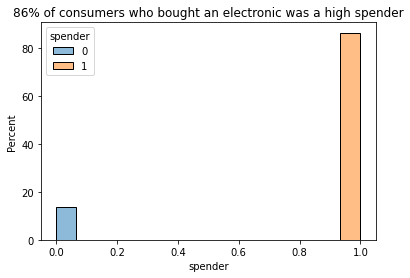

In [12]:
cat_plot = data.loc[data.CATEGORY_Electronics > 0, ["spender", "CATEGORY_Electronics"]]

print(cat_plot.spender.value_counts()/cat_plot.spender.count())

sns.histplot(cat_plot, x="spender", hue="spender", stat="percent").set_title("86% of consumers who bought an electronic was a high spender")



# KNN

In [16]:
# Train
knn = KNeighborsClassifier(n_neighbors = 5, metric='euclidean') # could also set metric = 'manhattan'
knn.fit(X_train, y_train)

# Test
y_test_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_test_knn)
print(f"The test data performance for the K-nearest neighbor is {acc_knn:.2%}")
print(classification_report(y_test, y_test_knn, digits = 4))

The test data performance for the K-nearest neighbor is 64.85%
              precision    recall  f1-score   support

           0     0.6471    0.6535    0.6503     24919
           1     0.6500    0.6436    0.6468     24920

    accuracy                         0.6485     49839
   macro avg     0.6486    0.6485    0.6485     49839
weighted avg     0.6486    0.6485    0.6485     49839



# KNN AUC Score

In [17]:
roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

0.6990

# Evaluation of KNN

This model has a 64% recall score meaning it correctly predicted high spenders 64% of the time.

# Decision Tree

In [30]:
scv = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 1) # Divide data into 4 equal-sized dispoint subsets.
                                                                   # I use the same random_state and shuffle = True
                                                                   # to make sure we get the exactly the same split

In [ ]:
dt = DecisionTreeClassifier(random_state = 1)

param_grid = {'max_depth': range(5, 10), # choose a integer between 5 and 10
              'criterion': ('entropy', 'gini'), # choose between two criterion
              'min_impurity_decrease': np.linspace(0.001, 0.003, 5) } # choose 5 evenly spaced number
                                                                      # between 0.001 to 0.003

clf_grid = GridSearchCV(dt, # Decision tree with default setting
                        param_grid, # Candidate parameters
                        cv = scv, # 4-fold cross validation defined above
                        verbose = 3, # show validation progress
                        scoring = 'accuracy', # Use accuracy to select the best model parameters
                        return_train_score = True) # Show training scores (e.g. accuracy)
clf_grid.fit(X_train, y_train) # Conduct cross validation on the training data

In [33]:
# Print the tuned parameters and score
print(f"Tuned Decision Tree Parameters: {clf_grid.best_params_}")
print(f"Best score is {clf_grid.best_score_:.2%}")

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_impurity_decrease': 0.001}
Best score is 64.59%


In [34]:
y_pred_grid = clf_grid.predict(X_test)
print(f"The test data performance for the best model is {accuracy_score(y_test, y_pred_grid):.2%}")
print(classification_report(y_test, y_pred_grid, digits = 4))

The test data performance for the best model is 64.00%
              precision    recall  f1-score   support

           0     0.6503    0.6056    0.6271     24919
           1     0.6310    0.6744    0.6519     24920

    accuracy                         0.6400     49839
   macro avg     0.6406    0.6400    0.6395     49839
weighted avg     0.6406    0.6400    0.6395     49839



In [35]:
roc_auc_score(y_test, clf_grid.predict_proba(X_test)[:, 1])

0.7071

# Decision Tree Evaluation

This model had a higher recall than the KNN, at 67%, and a higher AUC score at 70%. The decision tree had the highest recall score meaning this would be the best model for our business problem as it correctly predicted high-spenders 67% of the time. This means we would be wasting less marketing dollars on missclasified high-spenders as opposed to with KNN and random forest. With an AUC score of 70%, the model gives QVC a 20% improvement over the baseline of randomly guessing. Randomly guessing is 50/50 as the target variable is 50/50.

# Random Forest

In [20]:
# train
rf_clf = RandomForestClassifier(max_depth = 9, max_features = 0.9, 
                                n_estimators = 80,
                                random_state = 1)
rf_clf.fit(X_train, y_train)

# test
y_test_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, y_test_rf)

print(f"The test data performance for Random Forest is {acc_rf:.2%}")
print(classification_report(y_test, y_test_rf, digits = 4))

The test data performance for Random Forest is 67.00%
              precision    recall  f1-score   support

           0     0.6610    0.6981    0.6790     24919
           1     0.6801    0.6419    0.6605     24920

    accuracy                         0.6700     49839
   macro avg     0.6705    0.6700    0.6697     49839
weighted avg     0.6705    0.6700    0.6697     49839



In [21]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)
# Use cross_validate to obtain the accuracy from cross validation
cv_results = cross_validate(rf_clf, # dt = DecisionTreeClassifier(max_depth = 5, criterion = "entropy", random_state = 42)
                            X_train, y_train, # Data from titanic_train_cleaned.csv
                            cv = cv, # use the previously defined stratefied KFold object
                            scoring = ["accuracy"], # Return accuracy score, you can include other scores, e.g. f1
                            return_train_score = True) # Return evaluations on training data
pprint.pprint(cv_results) # Return a dictionary with multiple statistics, e.g., fit time, train and test accuracy.

# Obtain test accuracy
cv_acc = cv_results["test_accuracy"]
print(cv_acc)
print(cv_acc.mean())
print(cv_acc.std())
print(f"The accuracy of the cross validation is {cv_acc.mean():.2%} +/- {cv_acc.std():.2%}")

{'fit_time': array([4.2608, 4.2538, 4.2605, 4.2697, 4.3113]),
 'score_time': array([0.0817, 0.0798, 0.0753, 0.0948, 0.0802]),
 'test_accuracy': array([0.6762, 0.6734, 0.6677, 0.6885, 0.6611]),
 'train_accuracy': array([0.7191, 0.7212, 0.7106, 0.7154, 0.7195])}
[0.6762 0.6734 0.6677 0.6885 0.6611]
0.673388512666165
0.009147569256493442
The accuracy of the cross validation is 67.34% +/- 0.91%


# Random Forest Evaluation

The random forest had a lower recall score, 64%, than KNN and decision tree models.

# Random Forest Feature Importance

In [22]:
# create a dataframe to store features names and the importance
rf_imp = pd.DataFrame(list(zip(X_train.columns, rf_clf.feature_importances_)), 
                     columns = ['feature', 'rf_imp_score']).sort_values(by = 'rf_imp_score', ascending = False)
rf_imp

,feature,rf_imp_score
6,ORDER_DAY,0.184399
15,CATEGORY_Apparel,0.168804
18,CATEGORY_Electronics,0.152471
24,CATEGORY_Home Decor,0.116573
7,ORDER_HOUR,0.080093
5,ORDER_MONTH,0.061235
23,CATEGORY_Health/Beauty,0.051808
3,PLATFORM_QVC.COM,0.050501
13,NEW_CUST,0.032040
25,CATEGORY_Housewares,0.022067


# Clustering

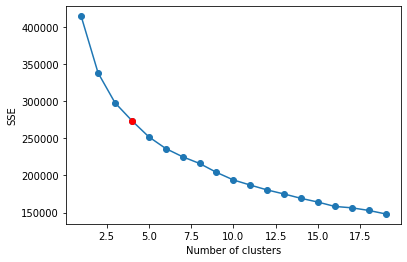

In [23]:
scaler = MinMaxScaler()
norm_data = pd.DataFrame(data = scaler.fit_transform(data), columns = data.columns)
from sklearn.cluster import KMeans
sse = [] # Sum of Squared Error of data points to centroid; The smaller the better.
for i in range(1, 20): # get the prefect number of clusters from 1 to 20
    data_kmeans = KMeans(n_clusters = i, random_state = 42)
    data_kmeans.fit(norm_data)
    sse.append(data_kmeans.inertia_)
    
plt.plot(range(1, 20), sse, marker = 'o')
plt.plot(4, sse[3], color = 'r', marker = 'o') # plot red mark on k = 4
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [24]:
data_kmeans_4 = KMeans(n_clusters = 4, random_state = 42)
data_kmeans_4.fit(norm_data)

KMeans(n_clusters=4, random_state=42)

In [25]:
norm_data['cluster'] = data_kmeans_4.labels_
print(norm_data['cluster'].value_counts())
norm_data.describe()

2    78965
3    76224
0    48372
1    45630
Name: cluster, dtype: int64


,PLATFORM_On Air - 2nd Channel,PLATFORM_QVC INSIDER MAGAZINE,PLATFORM_QVC Voices,PLATFORM_QVC.COM,PLATFORM_Streaming video,ORDER_MONTH,ORDER_DAY,ORDER_HOUR,SEGMENT_2,SEGMENT_3,SEGMENT_4,HOLD,JAN_HOLD,NEW_CUST,CATEGORY_App/Accss Event,CATEGORY_Apparel,CATEGORY_Collectibles,CATEGORY_Costume Jewelry,CATEGORY_Electronics,CATEGORY_Entertainment,CATEGORY_Fun & Leisure,CATEGORY_Gift Cards,CATEGORY_Health,CATEGORY_Health/Beauty,CATEGORY_Home Decor,CATEGORY_Housewares,CATEGORY_IQVC Divisional,CATEGORY_Jewelry,CATEGORY_License Hardgds,CATEGORY_PUBLIC RELATION,CATEGORY_Returns,CATEGORY_Textile/Furnit,spender,cluster
count,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.0,249191.000000,249191.000000,249191.0,249191.0,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.000000,249191.0,249191.000000,249191.000000,249191.000000,249191.000000
mean,0.009401,0.000524,0.000048,0.464885,0.000004,0.526643,0.473860,0.601051,0.0,0.622771,0.156037,0.0,0.0,0.127597,0.003489,0.086303,0.000783,0.005922,0.028577,0.002011,0.016892,0.000078,0.003444,0.231739,0.430888,0.061666,0.036700,0.052465,0.000324,0.0,0.000022,0.015194,0.500002,1.734541
std,0.078418,0.018944,0.006128,0.478128,0.002003,0.341533,0.235083,0.219718,0.0,0.484694,0.362891,0.0,0.0,0.333641,0.045501,0.204877,0.023153,0.059800,0.129681,0.034804,0.091628,0.007238,0.048501,0.364648,0.430188,0.163052,0.153732,0.166634,0.015011,0.0,0.004067,0.094955,0.500001,1.093160
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.306667,0.478261,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.214286,0.000000,0.500000,0.475926,0.608696,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,2.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.800000,0.633333,0.756522,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000


In [26]:
for col in data.columns:
    if "ORDER_MONTH" or "ORDER_DAY" or "ORDER_HOUR" in col:
        norm_data[col] = data[col]

In [27]:
norm_data.head()

,PLATFORM_On Air - 2nd Channel,PLATFORM_QVC INSIDER MAGAZINE,PLATFORM_QVC Voices,PLATFORM_QVC.COM,PLATFORM_Streaming video,ORDER_MONTH,ORDER_DAY,ORDER_HOUR,SEGMENT_2,SEGMENT_3,SEGMENT_4,HOLD,JAN_HOLD,NEW_CUST,CATEGORY_App/Accss Event,CATEGORY_Apparel,CATEGORY_Collectibles,CATEGORY_Costume Jewelry,CATEGORY_Electronics,CATEGORY_Entertainment,CATEGORY_Fun & Leisure,CATEGORY_Gift Cards,CATEGORY_Health,CATEGORY_Health/Beauty,CATEGORY_Home Decor,CATEGORY_Housewares,CATEGORY_IQVC Divisional,CATEGORY_Jewelry,CATEGORY_License Hardgds,CATEGORY_PUBLIC RELATION,CATEGORY_Returns,CATEGORY_Textile/Furnit,spender,cluster
0,0.0,0.0,0.0,0.0,0.0,2.000000,17.250000,12.500000,0,1,0,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.750000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0,2
1,0.0,0.0,0.0,0.0,0.0,2.166667,16.000000,10.833333,0,0,1,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.000000,0.000000,0.0,0.166667,0.0,0.0,0.0,0.0,1,0
2,0.0,0.0,0.0,0.0,0.0,2.000000,16.000000,12.500000,0,1,0,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.500000,0.500000,0.0,0.000000,0.0,0.0,0.0,0.0,0,2
3,0.0,0.0,0.0,1.0,0.0,2.000000,13.000000,22.000000,0,0,0,0,0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0,1
4,0.0,0.0,0.0,0.0,0.0,1.666667,14.666667,14.555556,0,0,1,0,0,0,0.0,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.111111,0.111111,0.0,0.222222,0.0,0.0,0.0,0.0,0,1


In [28]:
norm_data.dtypes

PLATFORM_On Air - 2nd Channel    float64
PLATFORM_QVC INSIDER MAGAZINE    float64
PLATFORM_QVC Voices              float64
PLATFORM_QVC.COM                 float64
PLATFORM_Streaming video         float64
ORDER_MONTH                      float64
ORDER_DAY                        float64
ORDER_HOUR                       float64
SEGMENT_2                          int64
SEGMENT_3                          int64
SEGMENT_4                          int64
HOLD                               int64
JAN_HOLD                           int64
NEW_CUST                           int64
CATEGORY_App/Accss Event         float64
CATEGORY_Apparel                 float64
CATEGORY_Collectibles            float64
CATEGORY_Costume Jewelry         float64
CATEGORY_Electronics             float64
CATEGORY_Entertainment           float64
CATEGORY_Fun & Leisure           float64
CATEGORY_Gift Cards              float64
CATEGORY_Health                  float64
CATEGORY_Health/Beauty           float64
CATEGORY_Home De

In [29]:
pd.set_option('display.max_rows', 100)
group = norm_data.groupby('cluster').mean().T
group

cluster,0,1,2,3
PLATFORM_On Air - 2nd Channel,2.816187e-03,0.003276,4.333008e-03,0.003583
PLATFORM_QVC INSIDER MAGAZINE,7.156068e-05,0.000041,7.356217e-06,0.000011
PLATFORM_QVC Voices,3.593756e-06,0.000004,6.928318e-07,0.000000
PLATFORM_QVC.COM,6.381350e-01,0.612661,3.129662e-01,0.423858
PLATFORM_Streaming video,1.445672e-07,0.000000,0.000000e+00,0.000000
ORDER_MONTH,2.059709e+00,2.019509,2.024519e+00,2.099229
ORDER_DAY,1.529261e+01,15.308723,1.528331e+01,15.041461
ORDER_HOUR,1.355276e+01,13.575818,1.399657e+01,13.966504
SEGMENT_2,0.000000e+00,0.000000,0.000000e+00,0.000000
SEGMENT_3,0.000000e+00,0.000000,1.000000e+00,1.000000


# Conclusion:

We recommend QVC to employ our predictive model to identify high-paying customers and cross sell or upsell the most relevant products to them in marketing promotions. QVC can increase profitability using our model by maximing the marketing spend and marketing toward predicted high-spenders. This would waste less dollars associated with marketing toward individuals who will not spend more. More specifically, QVC should cross sell products from the Electronics, Apparel, Home Decor, Health/Beauty and Fun/Leisure categories as these categories are most important in predicting high-spenders. To maximize cross selling opportunities, QVC should focus on pairing items from the other 4 categories with those in the Electronics category, as Electronics is the strongest indicator of a customer’s propensity to spend heavily. 

The highest performing model associated with this initiative is the Decision Tree model, with an AUC score of 70% and a recall score of 67%. With a recall score of 67%, the model minimizes wasted marketing dollars associated with missclassifing a high-spender as a low spender. Using our model, QVC would have a 20% improvement in identifying high-spending and low-spending customers compared to prior methods of randomly guessing.

# Future work: aditional analysis needed/what limited our analysis?

Clustering didn't reveal meaningful insights. Future analysis could gather more data to have better clusters and develop customer personas based off of the clusters. Also, there were no demographic information on the customers, and this information might have increased the performance of our models. However, with demographic information we would need to get rid of any possible bias toward protected classes. Also, because of time constraints, we couldn't hyper tune paramters to the best of our ability with the decision tree. Adittional analysis would include using grid search cv and random search cv more to better tune paramters and increase the performance of the models. Also, we would tune our random forest model more.